# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionRfiYoloDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 3940


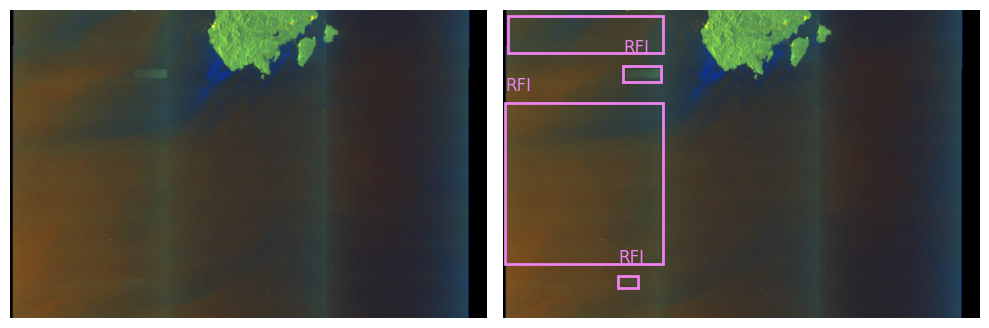

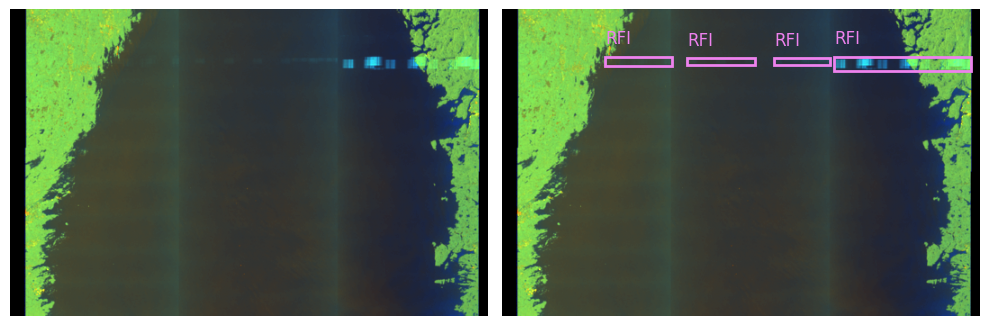

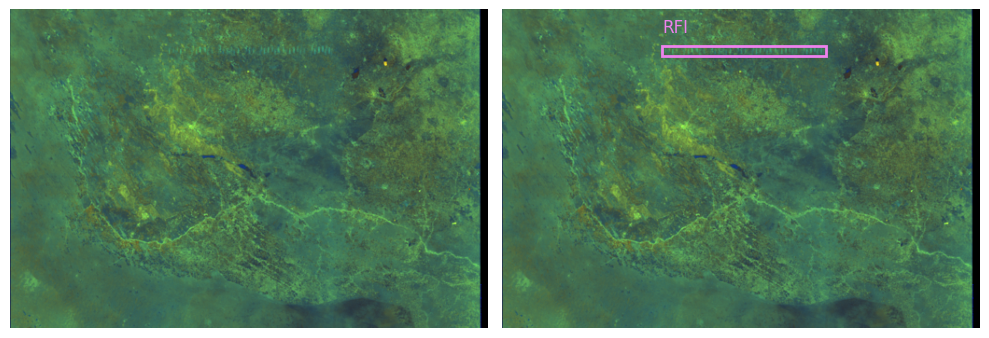

In [5]:
dataset_config = {
    "data_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotation_dir": "/home/dragik/data/rfi/YOLO/",
}
dataset = ObjectDetectionRfiYoloDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(17);
dataset.show_image(800);
dataset.show_image(1200);

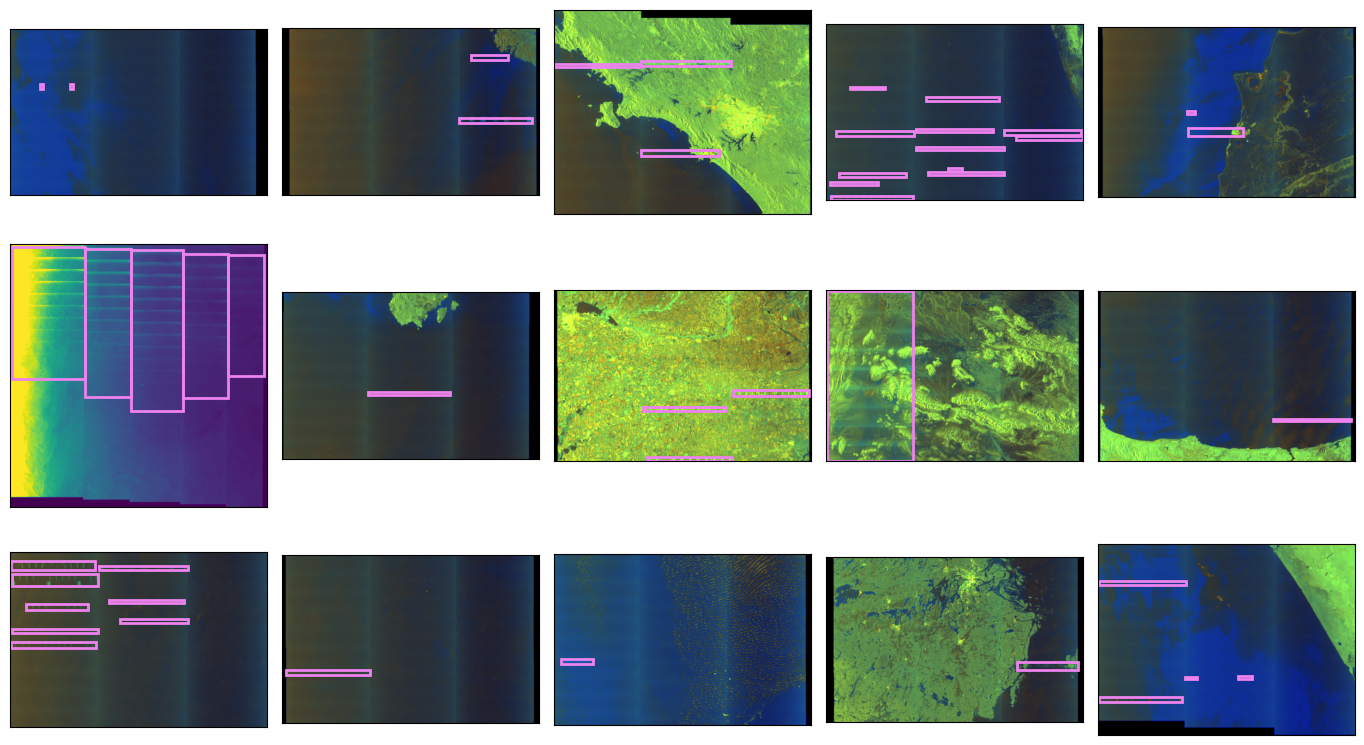

In [6]:
dataset.show_batch(15);

In [7]:
dataset.data_distribution_table()

,Label,Count
0,RFI,11724
1,Other Anomaly,301


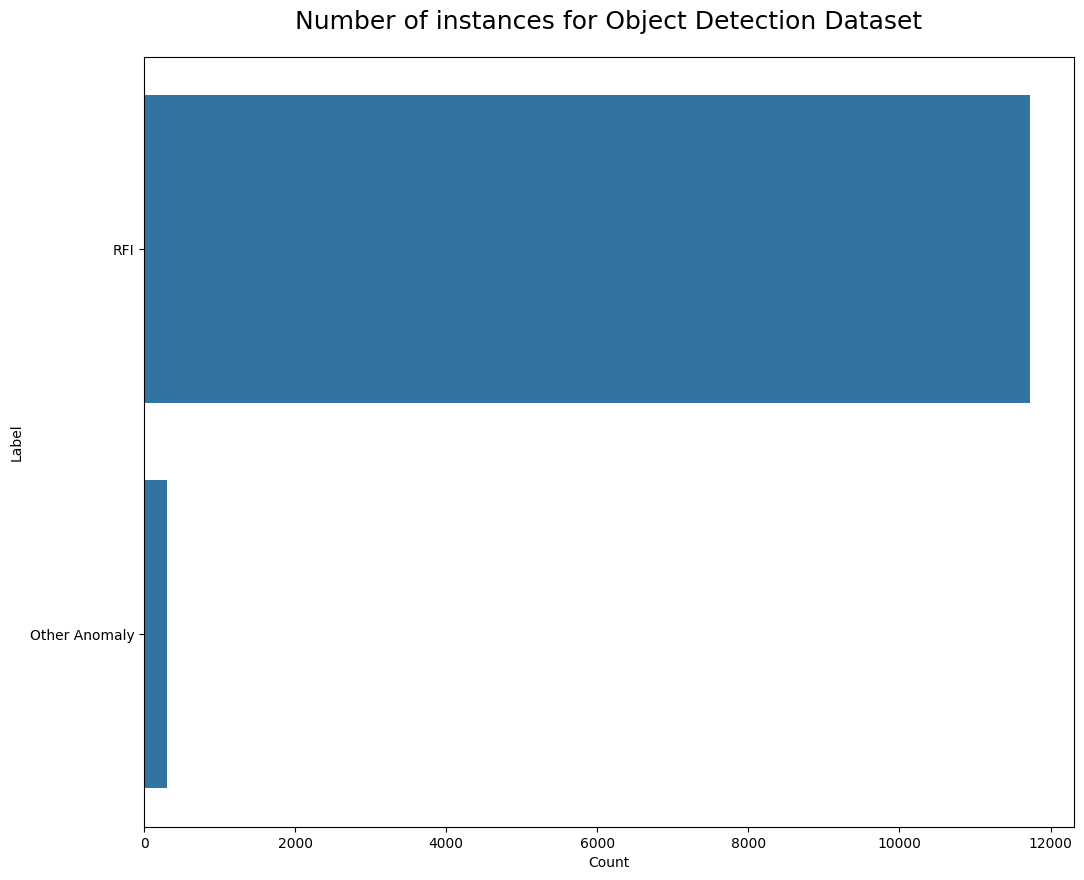

In [8]:
dataset.data_distribution_barchart();

## Load train data

In [9]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "data_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotation_dir": "/home/dragik/data/rfi/YOLO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionRfiYoloDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 3940


## Create the model

In [10]:
epochs = 10
model_directory = "/home/dragik/data/rfi/experiments/yolo/"
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [11]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:  20%|██████████████▍                                                         | 99/493 [00:34<02:07,  3.08it/s]

[1, 100], loss:  3.10821


training:  40%|████████████████████████████▋                                          | 199/493 [01:07<01:37,  3.03it/s]

[1, 200], loss:  1.53814


training:  61%|███████████████████████████████████████████                            | 299/493 [01:40<01:04,  3.00it/s]

[1, 300], loss:  1.45591


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:14<00:31,  2.96it/s]

[1, 400], loss:  1.26623


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:45<00:00,  2.97it/s]

epoch: 1, time: 166, loss:  0.21402



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.04it/s]


map:0.012606143020093441, map_50:0.031646959483623505, map_75:0.006622799672186375, map_small:0.016795586794614792, map_medium:0.014316330663859844, map_large:0.01981227472424507, mar_1:0.03853820636868477, mar_10:0.05598006770014763, mar_100:0.05598006770014763, mar_small:0.05719999969005585, mar_medium:0.05000000074505806, mar_large:0.06956521421670914, map_per_class:tensor(0.), tensor(0.0252), mar_100_per_class:tensor(0.), tensor(0.1120), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:08,  3.07it/s]

[2, 100], loss:  1.00018


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:35,  3.08it/s]

[2, 200], loss:  0.94382


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:02,  3.10it/s]

[2, 300], loss:  0.89616


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:31,  3.01it/s]

[2, 400], loss:  0.95744


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:42<00:00,  3.03it/s]

epoch: 2, time: 162, loss:  0.12058



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:22<00:00,  5.97it/s]


map:0.02684599906206131, map_50:0.060871947556734085, map_75:0.015393044799566269, map_small:0.04290300980210304, map_medium:0.013114089146256447, map_large:0.02261289395391941, mar_1:0.06362126022577286, mar_10:0.1679401993751526, mar_100:0.17209301888942719, mar_small:0.16200000047683716, mar_medium:0.17615385353565216, mar_large:0.188043475151062, map_per_class:tensor(0.), tensor(0.0537), mar_100_per_class:tensor(0.), tensor(0.3442), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:10,  3.02it/s]

[3, 100], loss:  0.74360


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:36,  3.06it/s]

[3, 200], loss:  0.78676


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:03,  3.06it/s]

[3, 300], loss:  0.77748


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.08it/s]

[3, 400], loss:  0.84171


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:41<00:00,  3.04it/s]

epoch: 3, time: 162, loss:  0.09760



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.09it/s]


map:0.03953968361020088, map_50:0.07989479601383209, map_75:0.03425508365035057, map_small:0.05590344965457916, map_medium:0.03251417353749275, map_large:0.05055883154273033, mar_1:0.07740864157676697, mar_10:0.22524917125701904, mar_100:0.23073089122772217, mar_small:0.2223999947309494, mar_medium:0.22807691991329193, mar_large:0.260869562625885, map_per_class:tensor(0.), tensor(0.0791), mar_100_per_class:tensor(0.), tensor(0.4615), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:07,  3.09it/s]

[4, 100], loss:  0.69098


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:34,  3.10it/s]

[4, 200], loss:  0.74278


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:02,  3.09it/s]

[4, 300], loss:  0.67618


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.11it/s]

[4, 400], loss:  0.76229


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:41<00:00,  3.05it/s]

epoch: 4, time: 162, loss:  0.09020



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.06it/s]


map:0.06399551033973694, map_50:0.11139465868473053, map_75:0.07457640022039413, map_small:0.08583295345306396, map_medium:0.0782463401556015, map_large:0.08108507841825485, mar_1:0.10215947031974792, mar_10:0.27358803153038025, mar_100:0.2817275822162628, mar_small:0.26840001344680786, mar_medium:0.29230770468711853, mar_large:0.28804346919059753, map_per_class:tensor(0.), tensor(0.1280), mar_100_per_class:tensor(0.), tensor(0.5635), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:06,  3.12it/s]

[5, 100], loss:  0.68148


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:34,  3.11it/s]

[5, 200], loss:  0.61998


training:  61%|███████████████████████████████████████████                            | 299/493 [01:37<01:02,  3.09it/s]

[5, 300], loss:  0.63795


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:09<00:30,  3.08it/s]

[5, 400], loss:  0.67364


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:40<00:00,  3.07it/s]

epoch: 5, time: 160, loss:  0.08338



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.02it/s]


map:0.05434519797563553, map_50:0.10556668043136597, map_75:0.04879237338900566, map_small:0.06908716261386871, map_medium:0.049726519733667374, map_large:0.09694651514291763, mar_1:0.10697674751281738, mar_10:0.2581395208835602, mar_100:0.262458473443985, mar_small:0.2280000001192093, mar_medium:0.2815384566783905, mar_large:0.302173912525177, map_per_class:tensor(0.), tensor(0.1087), mar_100_per_class:tensor(0.), tensor(0.5249), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:06,  3.11it/s]

[6, 100], loss:  0.53879


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:35,  3.07it/s]

[6, 200], loss:  0.58834


training:  61%|███████████████████████████████████████████                            | 299/493 [01:37<01:02,  3.11it/s]

[6, 300], loss:  0.63918


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:09<00:30,  3.11it/s]

[6, 400], loss:  0.59511


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:40<00:00,  3.07it/s]

epoch: 6, time: 160, loss:  0.07379



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:23<00:00,  5.89it/s]


map:0.08163918554782867, map_50:0.15985265374183655, map_75:0.07474807649850845, map_small:0.10101481527090073, map_medium:0.09405965358018875, map_large:0.11651688069105148, mar_1:0.11694352328777313, mar_10:0.27691030502319336, mar_100:0.27691030502319336, mar_small:0.2603999972343445, mar_medium:0.2834615409374237, mar_large:0.303260862827301, map_per_class:tensor(0.), tensor(0.1633), mar_100_per_class:tensor(0.), tensor(0.5538), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:09,  3.04it/s]

[7, 100], loss:  0.53027


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:38,  2.99it/s]

[7, 200], loss:  0.55043


training:  61%|███████████████████████████████████████████                            | 299/493 [01:39<01:03,  3.08it/s]

[7, 300], loss:  0.53488


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:12<00:30,  3.10it/s]

[7, 400], loss:  0.56901


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:42<00:00,  3.03it/s]

epoch: 7, time: 163, loss:  0.06995



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:21<00:00,  6.06it/s]


map:0.07252119481563568, map_50:0.13806916773319244, map_75:0.06271056085824966, map_small:0.09380073845386505, map_medium:0.07684009522199631, map_large:0.06399766355752945, mar_1:0.11428571492433548, mar_10:0.2677740752696991, mar_100:0.2699335515499115, mar_small:0.23240000009536743, mar_medium:0.30192306637763977, mar_large:0.281521737575531, map_per_class:tensor(0.), tensor(0.1450), mar_100_per_class:tensor(0.), tensor(0.5399), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:09,  3.05it/s]

[8, 100], loss:  0.48713


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:35,  3.09it/s]

[8, 200], loss:  0.51999


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:02,  3.08it/s]

[8, 300], loss:  0.52655


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.08it/s]

[8, 400], loss:  0.57841


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:41<00:00,  3.05it/s]

epoch: 8, time: 162, loss:  0.06651



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:25<00:00,  5.75it/s]


map:0.10839255899190903, map_50:0.1858023703098297, map_75:0.11184454709291458, map_small:0.12852843105793, map_medium:0.09294801205396652, map_large:0.17262503504753113, mar_1:0.13089701533317566, mar_10:0.3013288974761963, mar_100:0.30747509002685547, mar_small:0.2791999876499176, mar_medium:0.3203846216201782, mar_large:0.3478260934352875, map_per_class:tensor(0.), tensor(0.2168), mar_100_per_class:tensor(0.), tensor(0.6150), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:09,  3.05it/s]

[9, 100], loss:  0.43492


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:35,  3.07it/s]

[9, 200], loss:  0.47813


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:02,  3.11it/s]

[9, 300], loss:  0.48308


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:10<00:30,  3.08it/s]

[9, 400], loss:  0.46340


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:41<00:00,  3.06it/s]

epoch: 9, time: 161, loss:  0.06000



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.11it/s]


map:0.10165540874004364, map_50:0.17853112518787384, map_75:0.10285785794258118, map_small:0.13144415616989136, map_medium:0.0985986515879631, map_large:0.1068229228258133, mar_1:0.12774085998535156, mar_10:0.3006644546985626, mar_100:0.3033222556114197, mar_small:0.28679999709129333, mar_medium:0.3088461458683014, mar_large:0.332608699798584, map_per_class:tensor(0.), tensor(0.2033), mar_100_per_class:tensor(0.), tensor(0.6066), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:06,  3.11it/s]

[10, 100], loss:  0.43324


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:33,  3.14it/s]

[10, 200], loss:  0.52210


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.15it/s]

[10, 300], loss:  0.49542


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:08<00:30,  3.13it/s]

[10, 400], loss:  0.53361


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:39<00:00,  3.10it/s]

epoch: 10, time: 159, loss:  0.06276



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:19<00:00,  6.21it/s]


map:0.10549311339855194, map_50:0.18930257856845856, map_75:0.1049790009856224, map_small:0.16857445240020752, map_medium:0.07120111584663391, map_large:0.10587197542190552, mar_1:0.11378737539052963, mar_10:0.27159467339515686, mar_100:0.277242511510849, mar_small:0.27239999175071716, mar_medium:0.2730769217014313, mar_large:0.302173912525177, map_per_class:tensor(0.), tensor(0.2110), mar_100_per_class:tensor(0.), tensor(0.5545), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)
Train loss: [0.9873938569799066, 0.9731540009379387, 0.9604603163897991, 0.9360044896602631, 0.9456548020243645, 0.9183608144521713, 0.9274788051843643, 0.891607441008091, 0.8983445912599564, 0.8945068866014481]
Validation loss: []
Train time per epochs: [166, 162, 162, 162, 160, 160, 163, 162, 161, 159]
Finished training. training time: 1617
